In [2]:
import pandas as pd

In [3]:
import chromalyzer

In [4]:
raw_sample = pd.read_csv('/usr/scratch/NASA/raw/230823_06_Jarosite_Soil_300uLDCM_100oC24h.csv')

In [8]:
M_Z = 30
threshold = 0.5
raw_sample[(raw_sample['M/Z'] > M_Z - threshold) & (raw_sample['M/Z'] < M_Z + threshold)]


,Spectrum,1st Time (s),2nd Time (s),TOF,M/Z,Area,Resolution
0,0,2200.00,0.000,117248.168,30.00884,376.00,10720
1,0,2200.00,0.000,117313.340,30.04225,49.44,11552
131,1,2200.00,0.008,117248.145,30.00883,393.50,10048
132,1,2200.00,0.008,117313.531,30.04235,66.88,11232
273,2,2200.00,0.016,117248.105,30.00881,403.50,9536
...,...,...,...,...,...,...,...
203195408,1044998,10557.04,2.944,117299.484,30.03514,27.22,12384
203195409,1044998,10557.04,2.944,117313.004,30.04208,301.00,12576
203195726,1044999,10557.04,2.952,117248.004,30.00875,1486.00,13920
203195727,1044999,10557.04,2.952,117299.438,30.03512,28.00,12256


In [10]:
raw_sample

,Spectrum,1st Time (s),2nd Time (s),TOF,M/Z,Area,Resolution
0,0,2200.00,0.000,117248.168,30.00884,376.00,10720
1,0,2200.00,0.000,117313.340,30.04225,49.44,11552
2,0,2200.00,0.000,119162.816,30.99811,2952.00,20704
3,0,2200.00,0.000,121051.137,31.98950,5944.00,17760
4,0,2200.00,0.000,121114.773,32.02318,76.88,15968
...,...,...,...,...,...,...,...
203196043,1044999,10557.04,2.952,439384.430,422.17132,24.34,35712
203196044,1044999,10557.04,2.952,441359.938,425.97731,52.38,25728
203196045,1044999,10557.04,2.952,442966.852,429.08576,19.44,33120
203196046,1044999,10557.04,2.952,460617.766,463.97393,142.00,29440


In [11]:
def heatmap(df : pd.DataFrame, first_time_column_name : str = '1st Time (s)', second_time_column_name : 
            str = '2nd Time (s)', area_column_name : str = 'Area') -> pd.DataFrame:
    # Create heatmap data and then transpose it
    heatmap_data = df.pivot_table(values=area_column_name, index=first_time_column_name, columns=second_time_column_name, aggfunc='sum').T
    heatmap_data.fillna(0, inplace=True)
    # Reverse the order of rows to rotate 90 degrees counter-clockwise
    heatmap_data = heatmap_data.iloc[::-1]
    return heatmap_data

In [12]:
heatmap(raw_sample)

1st Time (s),2200.000,2203.504,2207.008,2210.512,2214.016,2217.520,2221.024,2224.528,2228.032,2231.536,...,10525.504,10529.008,10532.512,10536.016,10539.520,10543.024,10546.528,10550.032,10553.536,10557.040
2nd Time (s),,,,,,,,,,,,,,,,,,,,,
3.504,102271.42,106637.70,0.00,0.00,105051.55,102278.88,101687.46,0.00,0.00,104079.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3.496,102237.43,106799.72,107582.72,108742.19,105012.88,102918.65,101594.57,100131.03,100013.78,104734.99,...,163743.09,168725.44,165255.83,166621.83,162656.05,164762.40,166013.54,167092.49,163376.60,0.00
3.488,102651.42,107070.01,106995.87,109545.74,105229.35,103347.12,101618.88,100341.08,100335.76,104957.65,...,164710.23,168578.40,164449.74,166219.71,161829.61,164613.21,165981.64,166384.78,163988.92,0.00
3.480,103162.35,107171.23,106686.08,110064.11,105307.38,103820.25,101865.96,100325.58,100385.67,104481.10,...,165384.24,168741.67,164543.78,166119.17,162493.79,164990.54,165935.23,166028.23,164798.94,0.00
3.472,103730.19,107385.10,106697.96,110503.52,105841.87,103487.22,101655.62,100540.82,100379.54,104143.80,...,165628.57,168493.42,164446.10,165542.95,163016.27,164605.44,165374.50,165503.70,165136.20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.032,104669.31,102888.89,105243.32,106362.68,109526.52,105334.45,103046.47,101950.18,99410.62,100439.76,...,165054.99,161670.04,166653.01,167325.36,165869.19,167066.07,164021.33,165818.16,166753.21,163766.23
0.024,104892.07,102676.31,105952.83,106931.52,108375.64,105230.00,103077.03,102053.54,99200.28,99893.88,...,164531.17,161893.02,167291.66,167532.48,165852.01,166384.55,164100.15,165631.25,167391.30,163820.39
0.016,104942.87,102554.14,105799.61,107396.68,108862.55,105158.24,102500.17,102084.86,98889.45,99825.37,...,164241.73,162329.87,168102.88,167070.40,166100.95,164761.03,164893.43,165615.01,167786.18,163962.11


In [22]:
pd.read_csv('data/all_mz_values.csv').drop(columns=['Unnamed: 0'])

,M/Z
0,30.0
1,31.0
2,32.0
3,33.0
4,34.0
...,...
666,696.0
667,697.0
668,698.0
669,699.0


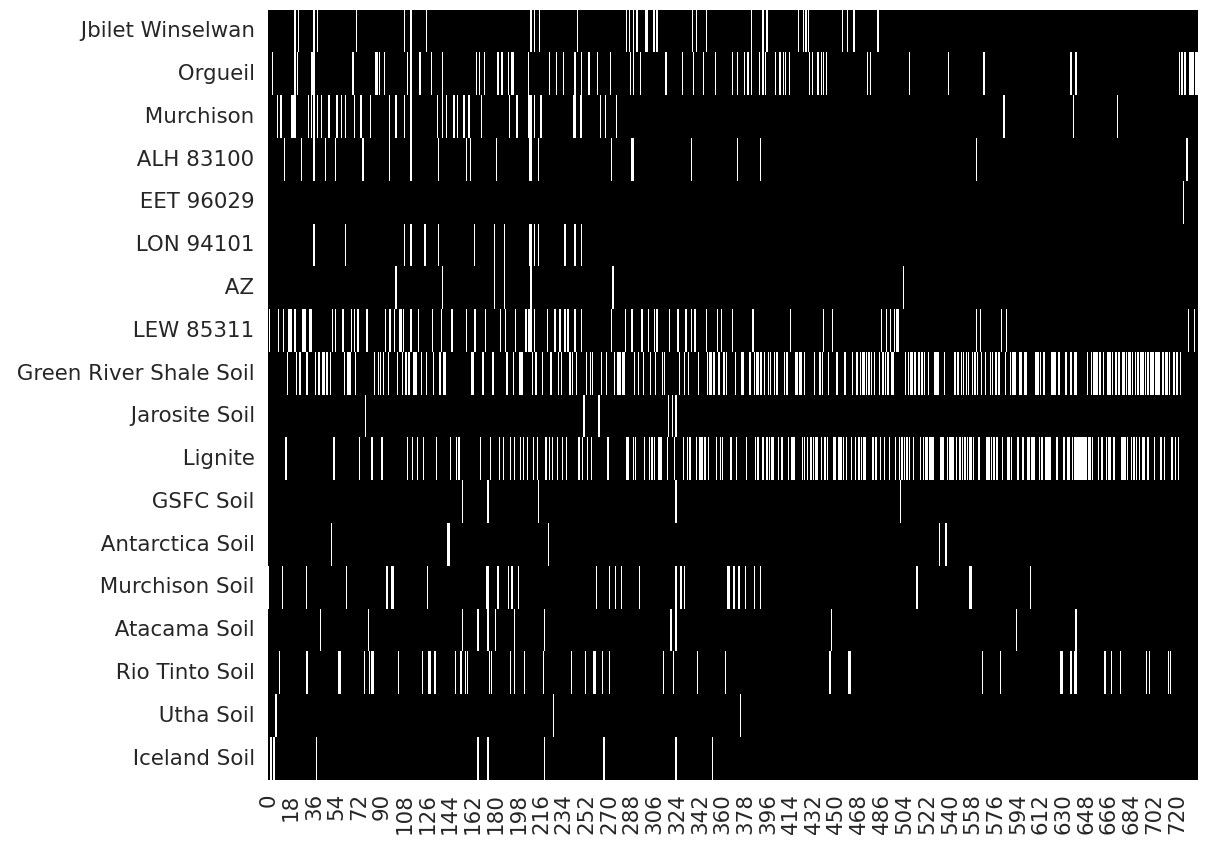

In [59]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
top_n = 1000

X_train = np.load('/usr/scratch/chromalyzer/features/features_lam1_0.75_lam2_5.0_rt1th_10_rt2th_100.npy')

train_samples = pd.read_csv('/usr/scratch/danial_stuff/Chromalyzer/data/labels.csv').reset_index(drop=True)

X_sorted = X_train[train_samples.sort_values('label').index].copy()

class_0_count = np.sum(train_samples['label'] == 0)
X_sorted[class_0_count:,:] = np.where(X_sorted[class_0_count:,:] == 1, 2, X_sorted[class_0_count:,:])


plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)

# Define colors for each value
colors = ["black", "white", "white"]  # Colors for 0, 1, and 2 respectively
cmap = mcolors.ListedColormap(colors)

# boundaries = [-0.5, 0.5, 1.5, 2.5]
# norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)


sns.heatmap(X_sorted[:,:top_n],cmap=cmap,yticklabels=train_samples.sort_values('label')['sample_name'].to_numpy() ,cbar=False)
# Save the plot as a PDF file
plt.savefig('All_features.pdf', format="pdf", bbox_inches='tight',dpi=400)

In [62]:
pd.read_csv('/usr/scratch/chromalyzer/features/features_lam1_0.75_lam2_5.0_rt1th_10_rt2th_100.csv').drop(columns=['Unnamed: 0'])

,m/z,RT1_start,RT2_start,RT1_end,RT2_end,RT1_center,RT2_center
0,30,6040.384,2.144,6040.384,2.144,6040.384,2.144
1,32,6488.896,3.472,6488.896,3.472,6488.896,3.472
2,32,6495.904,2.320,6495.904,2.320,6495.904,2.320
3,32,8335.504,1.912,8335.504,1.912,8335.504,1.912
4,32,7603.168,1.880,7603.168,1.880,7603.168,1.880
...,...,...,...,...,...,...,...
732,614,6961.936,2.016,6961.936,2.016,6961.936,2.016
733,629,7350.880,2.704,7350.880,2.704,7350.880,2.704
734,636,9327.136,2.232,9327.136,2.232,9327.136,2.232
735,663,6674.608,2.232,6674.608,2.232,6674.608,2.232


In [70]:
test = pd.read_csv('/usr/scratch/chromalyzer/lr_l2_results/top_features/lr_l2_signatures_combined.csv').drop(columns=['Unnamed: 0','p_value','samples','class'])
test.index = test.index + 1
test.head(10)

,coefficient,m/z,RT1,RT2
1,-0.026041,128.0,"[4071.136,4085.152]","[1.432,2.176]"
2,-0.025272,102.0,"[4071.136,4085.152]","[1.432,2.168]"
3,0.023625,162.0,"[5490.256,5493.76]","[1.008,1.288]"
4,-0.021509,63.0,"[4074.64,4085.152]","[1.44,2.176]"
5,0.018768,116.0,"[5490.256,5493.76]","[1.008,1.288]"
6,-0.016821,127.0,"[4071.136,4085.152]","[1.88,2.176]"
7,-0.016712,129.0,"[4071.136,4081.648]","[1.432,2.176]"
8,-0.016388,141.0,"[4743.904,4757.92]","[1.632,1.84]"
9,-0.016388,142.0,"[4743.904,4757.92]","[1.632,1.848]"
10,-0.016285,52.0,"[4071.136,4078.144]","[1.432,2.176]"


,Unnamed: 0,p_value,coefficient,m/z,RT1,RT2,samples,class
1,1,0.000316,-0.026041,128.0,"[4071.136,4085.152]","[1.432,2.176]","231003_01_AZ_400uLDCM_100oC24h.csv, 230901_07_...",0
2,2,0.000332,-0.025272,102.0,"[4071.136,4085.152]","[1.432,2.168]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
3,3,0.013657,0.023625,162.0,"[5490.256,5493.76]","[1.008,1.288]","231003_04_Icerland_Soil_300uLDCM_100oC24h.csv,...",1
4,4,0.001748,-0.021509,63.0,"[4074.64,4085.152]","[1.44,2.176]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
5,5,0.036652,0.018768,116.0,"[5490.256,5493.76]","[1.008,1.288]","231003_04_Icerland_Soil_300uLDCM_100oC24h.csv,...",1
6,6,0.016261,-0.016821,127.0,"[4071.136,4085.152]","[1.88,2.176]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
7,7,0.007487,-0.016712,129.0,"[4071.136,4081.648]","[1.432,2.176]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
8,8,0.014940,-0.016388,141.0,"[4743.904,4757.92]","[1.632,1.84]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
9,9,0.014940,-0.016388,142.0,"[4743.904,4757.92]","[1.632,1.848]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
10,10,0.008577,-0.016285,52.0,"[4071.136,4078.144]","[1.432,2.176]","230901_08_LEW85311_300uLDCM_100oC24h.csv, 2310...",0


In [75]:
import random
from statsmodels.sandbox.stats.multicomp import multipletests

# as example, all null hypotheses are true
pvals = [random.random() for _ in range(10)]
is_reject, corrected_pvals, _, _ = multipletests(pvals, alpha=0.1, method='fdr_bh')

In [76]:
is_reject

array([False,  True, False, False, False, False, False, False, False,
       False])

In [77]:
pvals

[0.32135094677240106,
 0.0026789955861592496,
 0.9191062816044157,
 0.38785043715880996,
 0.40206828933184435,
 0.6286246646788912,
 0.3329051111200324,
 0.7378663696418276,
 0.14638285092961834,
 0.5960207660220395]

In [79]:
import numpy as np

def remove_columns(matrix):
    # Compute the sum of each column
    col_sums = np.sum(matrix, axis=0)
    
    # Boolean mask for columns to keep
    # Columns are kept if their sum is not 1 or there are multiple ones
    keep_columns = (col_sums != 1) | ((col_sums == 1) & (np.max(matrix, axis=0) != 1))
    
    # Use the mask to filter out the columns
    filtered_matrix = matrix[:, keep_columns]
    
    return filtered_matrix

# Example usage
matrix = np.array([
    [0, 1, 0],
    [0, 0, 0],
    [0, 0, 0]
])

# Call the function with the example matrix
new_matrix = remove_columns(matrix)
print(new_matrix)

AttributeError: 'list' object has no attribute 'shape'

In [7]:
import pandas as pd

path = '/usr/scratch/chromalyzer/peaks/peaks_lambda1_0.75/lam2_5.0'


peaks = []
for i in range(30, 701):
    p = pd.read_csv(f'{path}/{i}.csv')
    peaks.append(p)

peaks_concat = pd.concat(peaks)

peaks_concat['csv_file_name'].value_counts()

/tmp/ipykernel_976510/3752012051.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  peaks_concat = pd.concat(peaks)


csv_file_name
230823_07_Green_River_Shale_Soil_500uLDCM_100oC24h.csv        232
230830_03_Lignite_300uLDCM_100oC24h-001.csv                   209
230901_08_LEW85311_300uLDCM_100oC24h.csv                       85
230830_02_Orgueil_300uLDCM_100oC24h-001.csv                    79
230823_02_Rio_Tinto_Soil_300uLDCM_100oC24h.csv                 52
230823_03_Murchison_Pristine_2.0_300uLDCM_100oC24h-003.csv     49
231003_02_Jbilet_Winselwan_300uLDCM_100oC24h.csv               35
230823_04_Murchison_Soil_300uLDCM_100oC24h-001.csv             33
230901_06_ALH83100_300uLDCM_100oC24h.csv                       23
230901_07_LON94101_300uLDCM_100oC24h.csv                       16
230823_01_Atacama_Soil_300uLDCM_100oC24h-001.csv               13
231003_04_Icerland_Soil_300uLDCM_100oC24h.csv                  10
231003_01_AZ_400uLDCM_100oC24h.csv                              7
230823_05_Antarctica_Soil_300uLDCM_100oC24h-001.csv             6
230823_06_Jarosite_Soil_300uLDCM_100oC24h.csv                 